In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("/kaggle/input/d/tobiasschebesta/merged-table/merged_table.csv", sep=";")




In [20]:
print(df.columns)

Index(['Country_Name', 'GDP_per_capita_USD', 'GDP_per_capita_growth_annual',
       'FDI_USD', 'total_cases_per_mio', 'total_deaths_per_mio'],
      dtype='object')


In [21]:
X = df[['GDP_per_capita_USD', 'FDI_USD']]
y = df['total_deaths_per_mio']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     total_deaths_per_mio   R-squared:                       0.370
Model:                              OLS   Adj. R-squared:                  0.338
Method:                   Least Squares   F-statistic:                     11.72
Date:                  Tue, 27 Jun 2023   Prob (F-statistic):           9.84e-05
Time:                          10:45:37   Log-Likelihood:                -328.95
No. Observations:                    43   AIC:                             663.9
Df Residuals:                        40   BIC:                             669.2
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

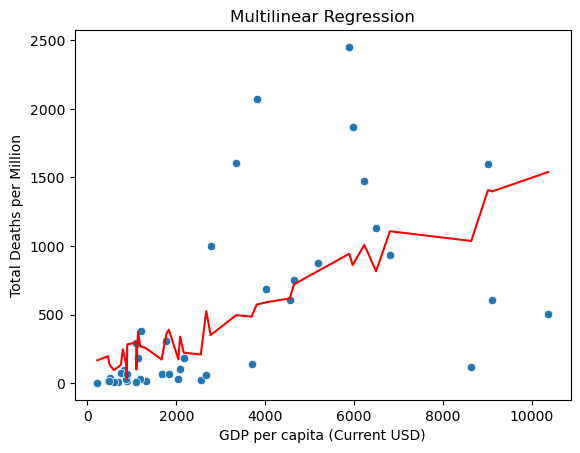

In [23]:
sns.scatterplot(x='GDP_per_capita_USD', y='total_deaths_per_mio', data=df)
sns.lineplot(x=df['GDP_per_capita_USD'], y=results.predict(X), color='red')
plt.xlabel('GDP per capita (Current USD)')
plt.ylabel('Total Deaths per Million')
plt.title('Multilinear Regression')
plt.show()


In [25]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

             Variable       VIF
0               const  3.111589
1  GDP_per_capita_USD  1.028403
2             FDI_USD  1.028403
